# Criar um banco de dados lake no Azure Synapse Analytics

## Entender os conceitos do banco de dados Lake

Em um data lake, não há nenhum esquema fixo. Os dados são armazenados em arquivos, que podem ser estruturados, semiestruturados ou não estruturados. Aplicativos e analistas de dados podem trabalhar diretamente com os arquivos no data lake usando as ferramentas de sua escolha; sem as restrições de um sistema de banco de dados relacional.

Você pode criar um banco de dados lake que inclua definições para tabelas, incluindo nomes de colunas e tipos de dados, bem como relacionamentos entre colunas de chave primária e estrangeira. As tabelas fazem referência a arquivos no data lake, permitindo que você aplique semântica relacional para trabalhar com os dados e consultá-los usando SQL. No entanto, o armazenamento dos arquivos de dados é desacoplado do esquema do banco de dados; permitindo mais flexibilidade do que um sistema de banco de dados relacional normalmente oferece.

**Esquema de banco de dados lake**

Você pode criar um banco de dados lake no Azure Synapse Analytics e definir as tabelas que representam as entidades para as quais você precisa armazenar dados.

**Armazenamento de banco de dados lake**

Os dados das tabelas em seu banco de dados lake são armazenados no data lake como arquivos Parquet ou CSV.

**Computação do banco de dados lake**
Para consultar e manipular os dados por meio das tabelas que você definiu, você pode usar um pool de SQL sem servidor do Azure Synapse para executar consultas SQL ou um pool do Azure Synapse Apache Spark para trabalhar com as tabelas usando a API Spark SQL.

## Explorar modelos de banco de dados

Você pode usar um dos modelos de banco de dados corporativo como ponto de partida para criar o banco de dados lake ou começar com um esquema em branco e adicionar e modificar tabelas dos modelos conforme necessário.

o Azure Synapse Analytics fornece uma coleção abrangente de modelos de banco de dados que refletem esquemas comuns encontrados em vários cenários de negócios; incluindo:

Agricultura
Automotivo
Serviços bancários
Bens de consumo
Comércio de energia e commodities
Frete e logística
Gerenciamento de fundos
Seguro de saúde
Prestador de serviços de saúde
Produção
Varejo
e muitos outros...

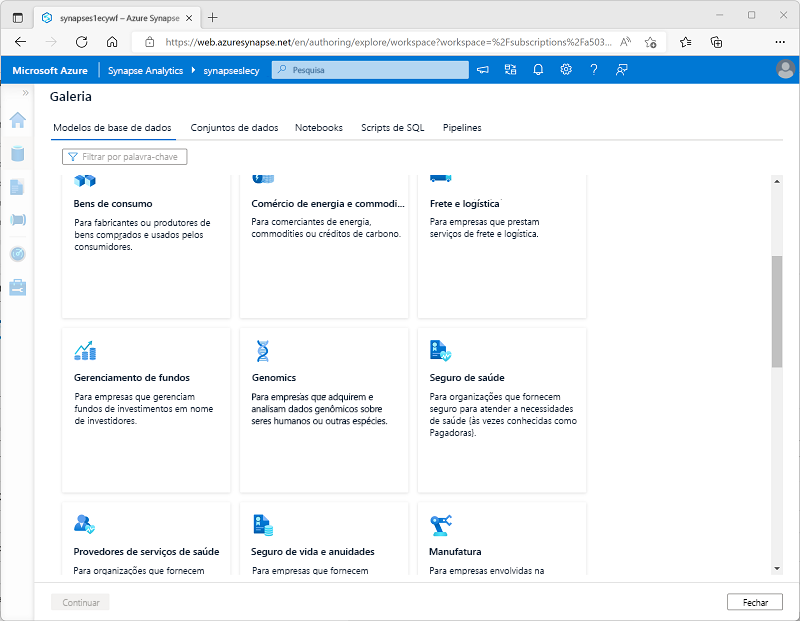

## Criar um banco de dados Lake

Você pode criar um banco de dados lake usando o designer de banco de dados lake no Azure Synapse Studio. Comece adicionando um novo banco de dados lake na página Dados , selecionando um modelo da galeria ou começando com um banco de dados lake em branco

Você pode criar um banco de dados lake usando o designer de banco de dados lake no Azure Synapse Studio. Comece adicionando um novo banco de dados lake na página Dados , selecionando um modelo da galeria ou começando com um banco de dados lake em branco.

Em seguida, adicione e personalize tabelas usando a interface do designer de banco de dados visual.

É recomendável armazenar todos os arquivos de banco de dados em um formato consistente dentro da mesma pasta raiz no data lake.

## Designer de banco de dados

A interface do designer de banco de dados no Azure Synapse Studio fornece uma superfície em que é possível arrastar, soltar e editar as tabelas em seu banco de dados e as relações entre elas.

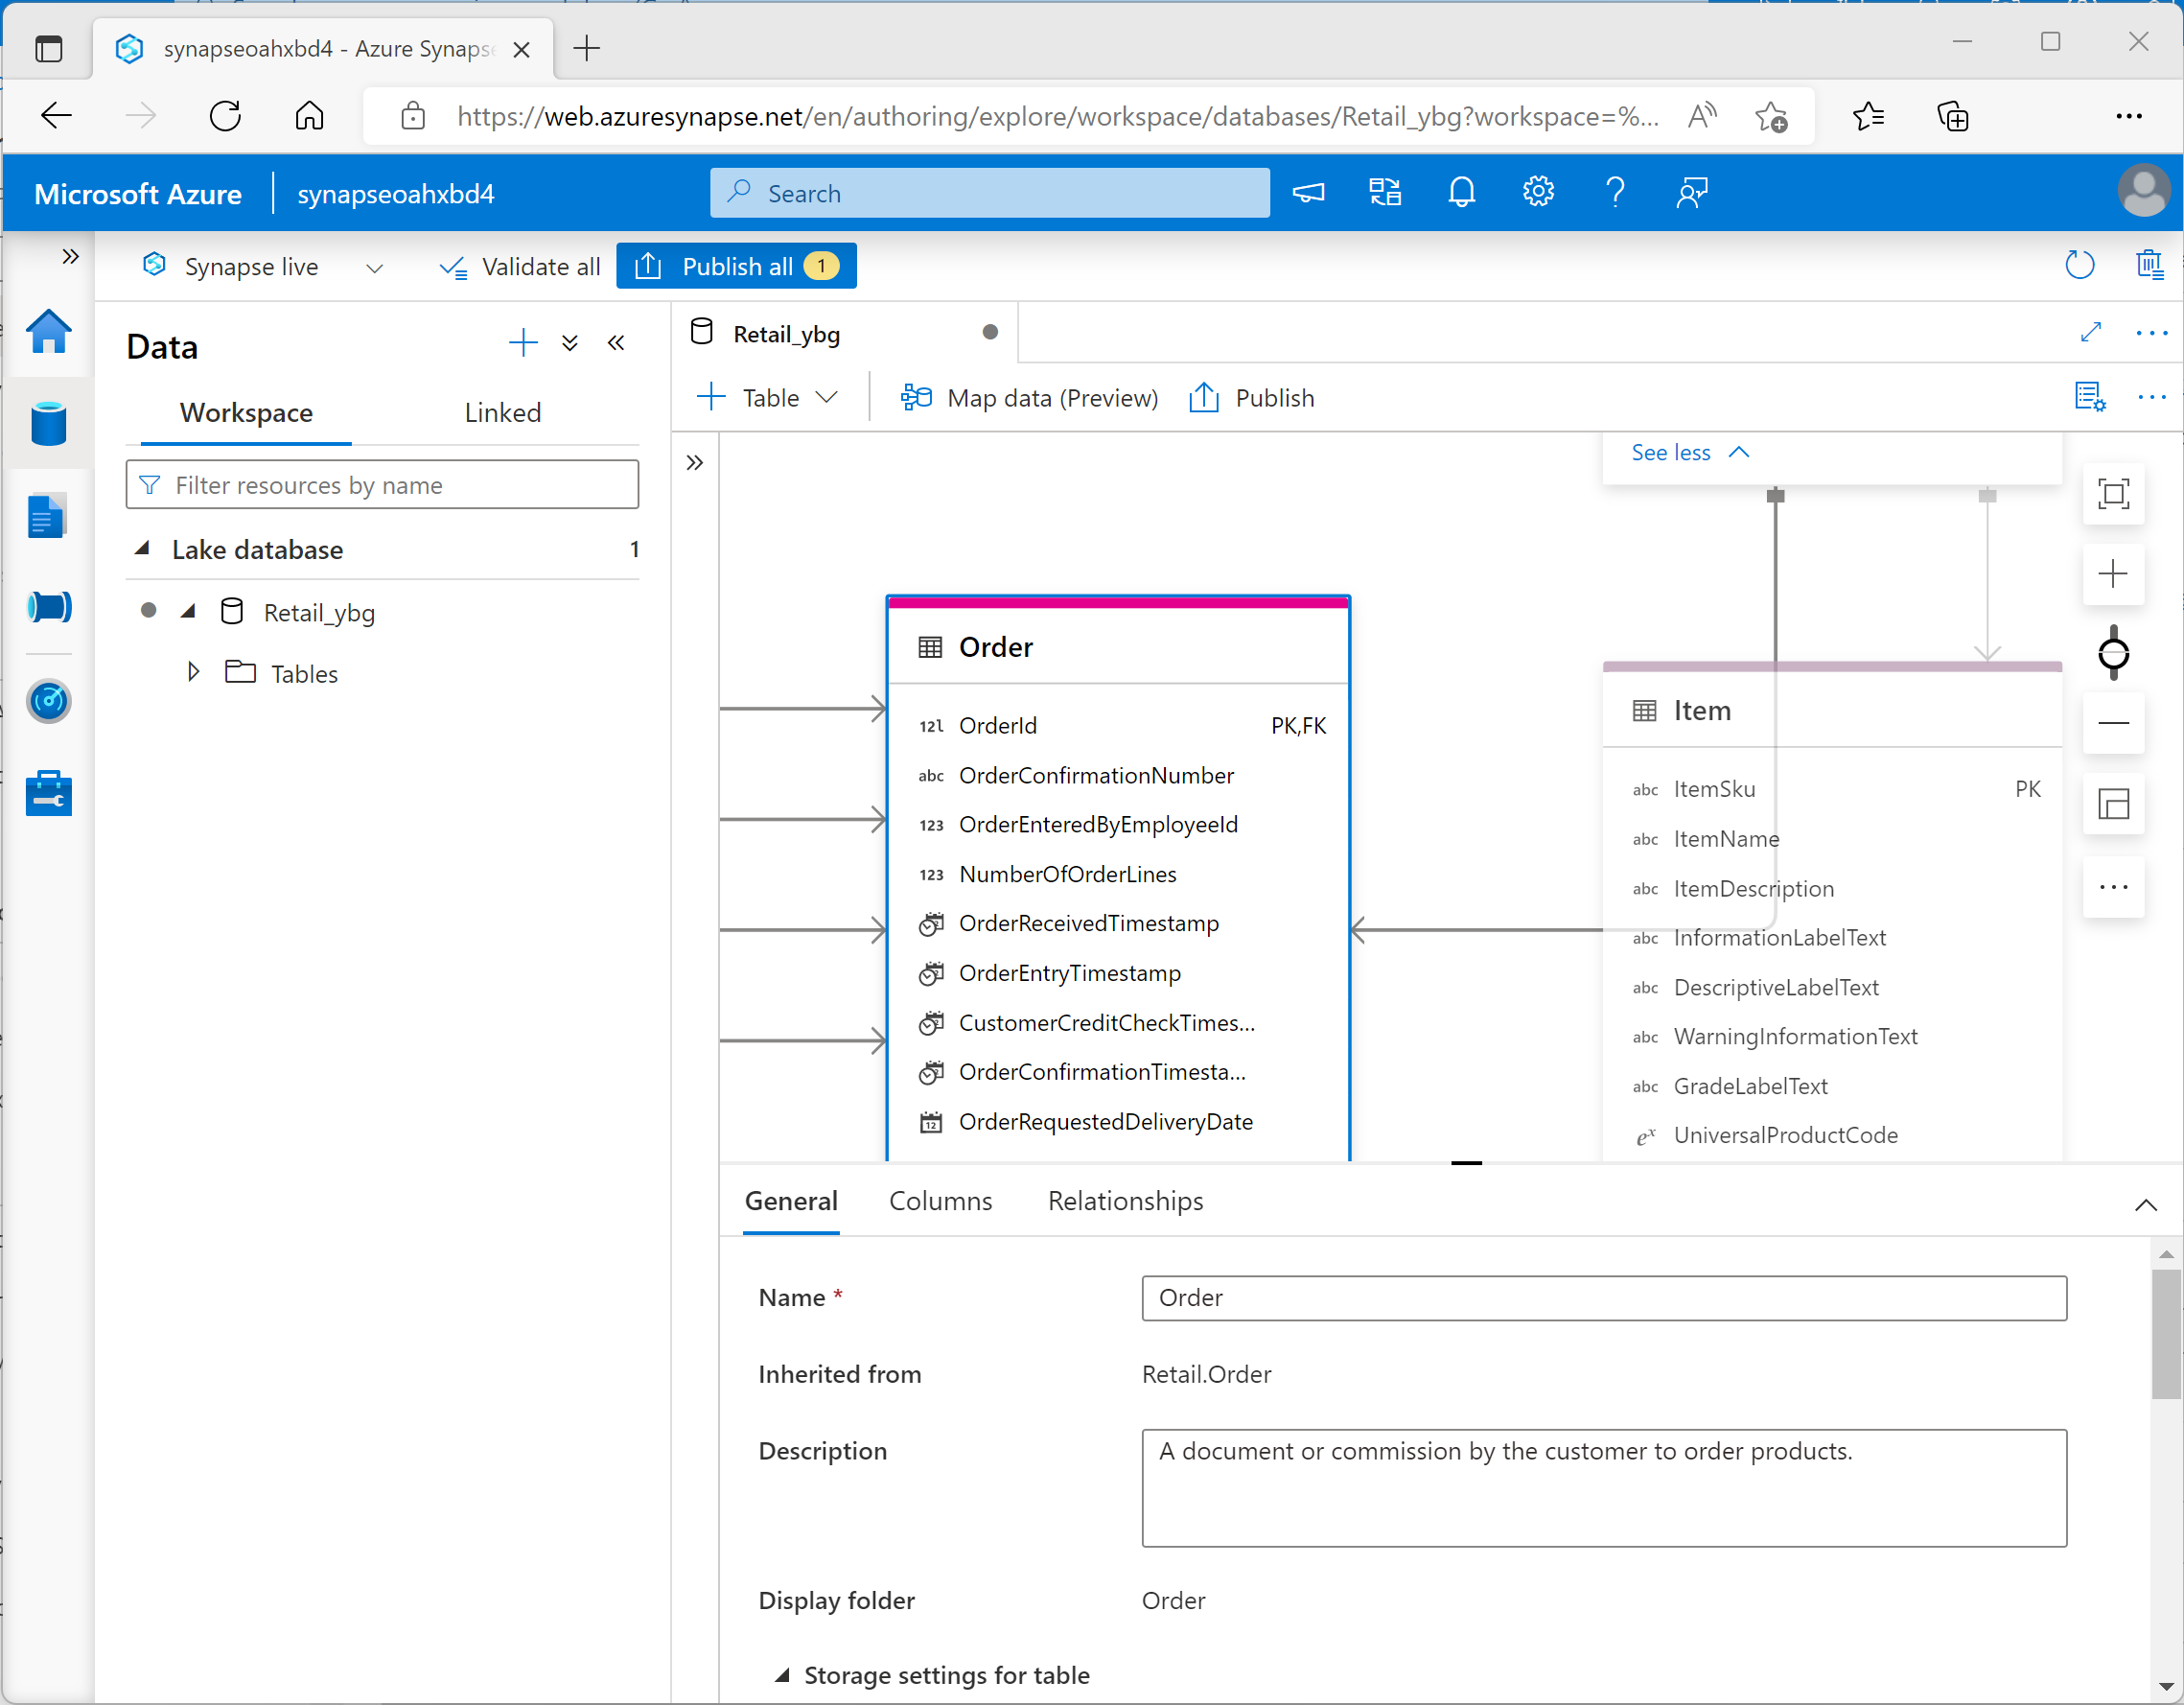

Ao usar o designer de banco de dados você pode definir o esquema do banco de dados adicionando ou removendo tabelas e:

Especificar as configurações de nome e armazenamento para cada tabela.
Especificar os nomes, o uso de chave, a nulidade e os tipos de dados para cada coluna.
Definir relações entre colunas-chave em tabelas.
Quando o esquema de banco de dados estiver pronto para uso, você poderá publicar o banco de dados e começar a usá-lo.

## Usando um pool do Apache Spark

Além de usar um pool de SQL sem servidor, você pode trabalhar com tabelas de banco de dados lake usando o Spark SQL em um pool do Apache Spark.

Por exemplo, você pode usar o código a seguir para inserir um novo registro de cliente na tabela Cliente .

In [ ]:
%%sql
INSERT INTO `RetailDB`.`Customer` VALUES (123, 'John', 'Yang')

Em seguida, você pode usar o seguinte código para consultar a tabela:

In [ ]:
%%sql
SELECT * FROM `RetailDB`.`Customer` WHERE CustomerID = 123

# Pratica Data Lake

## Provisionar um espaço de trabalho do Azure Synapse Analytics

No painel do PowerShell, insira os seguintes comandos para clonar este repositório:

In [ ]:
 rm -r dp-203 -f
 git clone https://github.com/MicrosoftLearning/dp-203-azure-data-engineer dp-203

After the repo has been cloned, enter the following commands to change to the folder for this exercise and run the setup.ps1 script it contains:

In [ ]:
 cd dp-203/Allfiles/labs/04
 ./setup.ps1

Após a conclusão do script de implantação, no portal do Azure, acesse o grupo de recursos dp203-xxxxxxx que ele criou e observe que esse grupo de recursos contém seu espaço de trabalho do Synapse, uma conta de armazenamento para seu data lake e um pool do Apache Spark.

Resultado(print do meu azure):

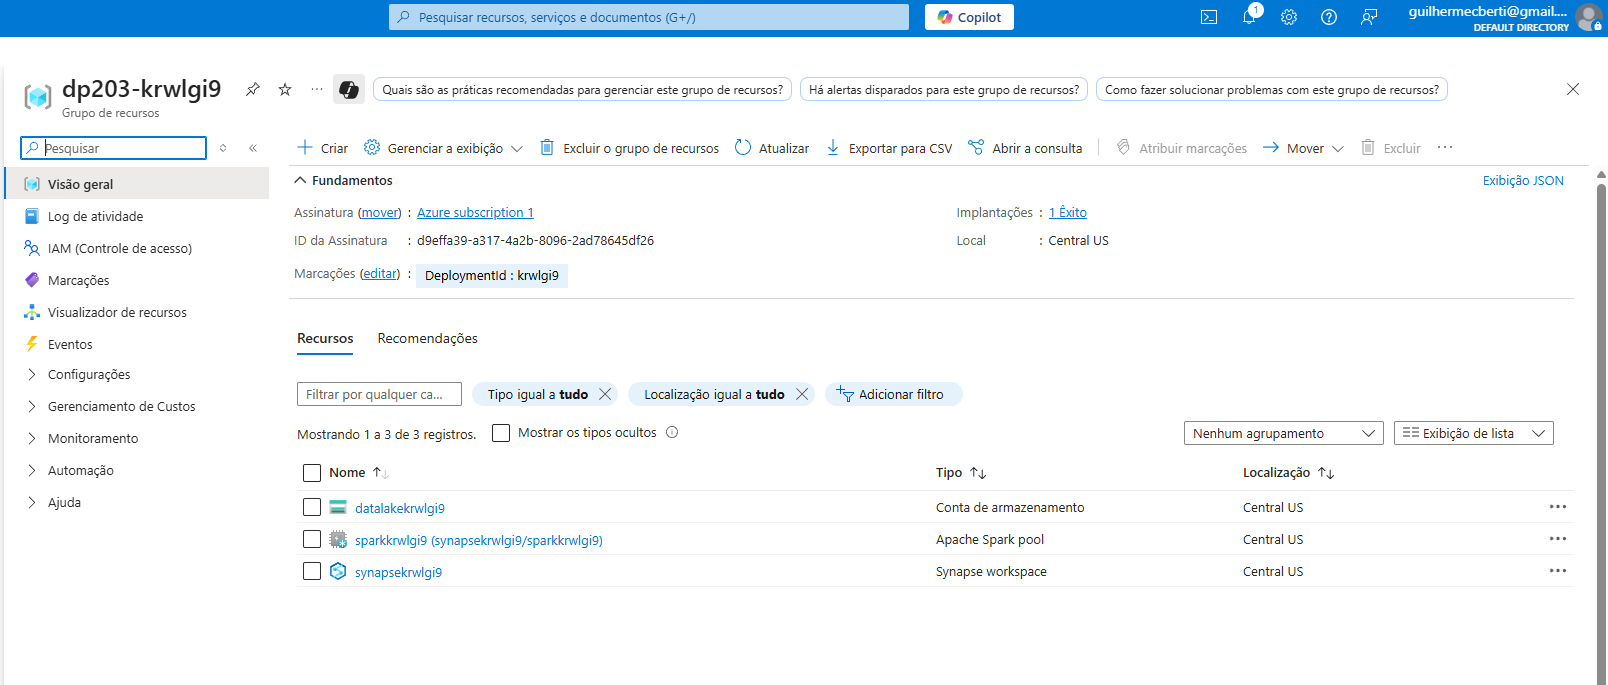

## Criar a lake database

Selecione a conta de armazenamento para seu data lake chamada datalakexxxxxxx

Dentro do contêiner datalakexxxxxx, selecione a pasta de arquivos

Na pasta de arquivos, você notará o Método de autenticação: listado como Chave de acesso (Alternar para conta de usuário Entra). Clique aqui para alterar para conta de usuário Entra.

Selecione seu espaço de trabalho Synapse e, na página Visão geral, no cartão Abrir Synapse Studio, selecione Abrir para abrir o Synapse Studio em uma nova guia do navegador; efetue login se solicitado.

Na página Data, visualize a guia Vinculado e verifique se seu espaço de trabalho inclui um link para sua conta de armazenamento do Azure Data Lake Storage Gen2

No menu +, selecione Banco de dados Lake para abrir uma nova aba na qual você pode criar seu esquema de banco de dados.

No painel Propriedades do novo banco de dados, altere o Nome para RetailDB e verifique se a propriedade Pasta de entrada é atualizada automaticamente para arquivos/RetailDB.

Deixe o formato dos dados como Texto delimitado (você também pode usar o formato Parquet e substituir o formato do arquivo para tabelas individuais - usaremos dados delimitados por vírgulas neste exercício).

Na parte superior do painel RetailDB, selecione Publicar para salvar o banco de dados até o momento.

resultado(print do meu Synapse Studio):

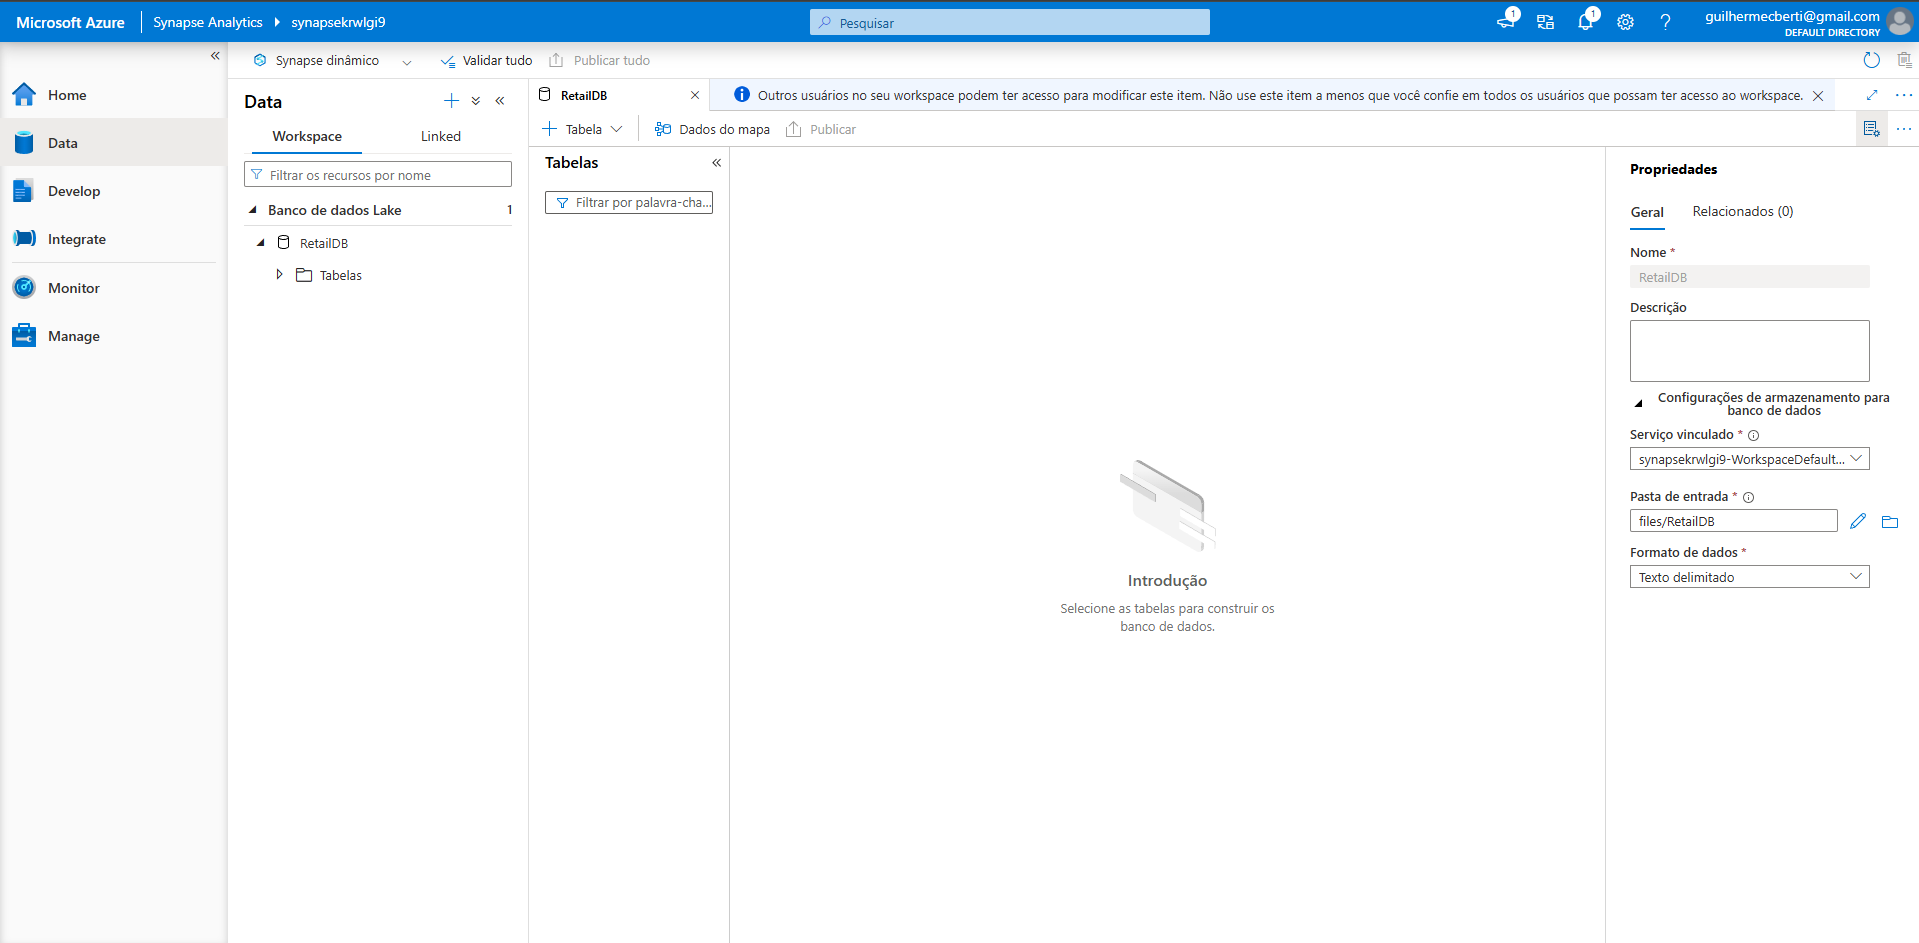

No painel Dados à esquerda, visualize a aba Vinculado. Em seguida, expanda o Azure Data Lake Storage Gen2 e o repositório principal do datalakexxxxxxxx para o seu espaço de trabalho synapsexxxxxxx e selecione o sistema de arquivos files, que atualmente contém uma pasta chamada synapse.

Na aba de arquivos que foi aberta, use o botão + Nova pasta para criar uma nova pasta chamada RetailDB - esta será a pasta de entrada para os arquivos de dados usados pelas tabelas no seu banco de dados.

resultado(print do meu Synapse Studio):

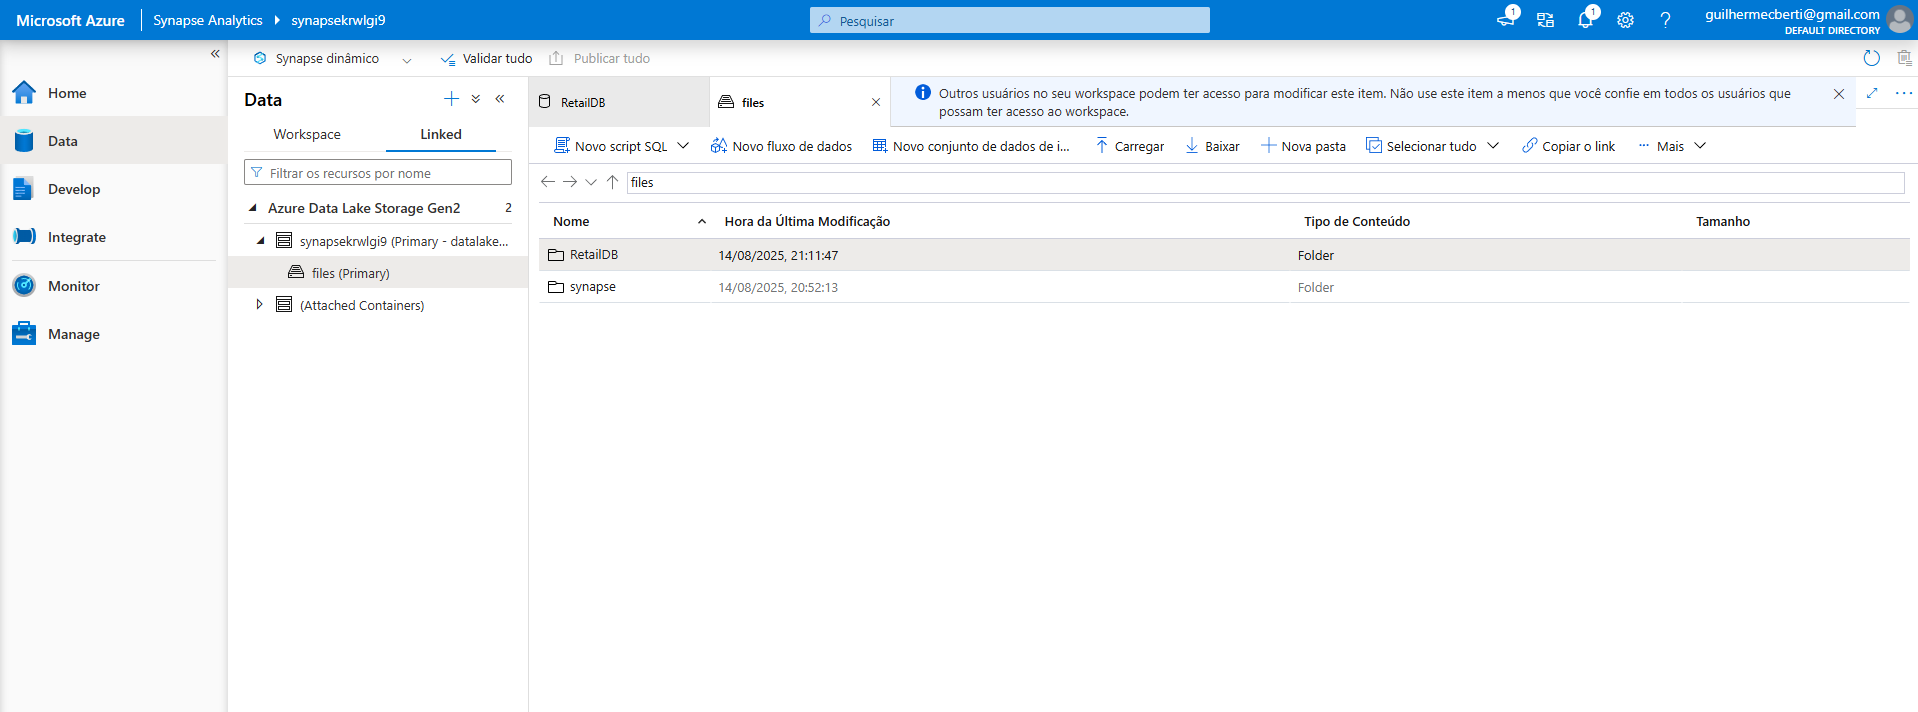

## Criar Tabela

Defina o esquema da tabela

Volte para a aba RetailDB para ver a definição do seu banco de dados e, na lista + Tabela, selecione Personalizado. Observe que uma nova tabela chamada Tabela_1 foi adicionada ao seu banco de dados.

Com a Tabela_1 selecionada, na guia Geral, na tela de design do banco de dados, altere a propriedade Nome para Customer.

Expanda a seção Configurações de armazenamento para tabela e observe que a tabela será armazenada como texto delimitado na pasta files/RetailDB/Customer no armazenamento de data lake padrão do seu espaço de trabalho Synapse.

Na aba Colunas, observe que, por padrão, a tabela contém uma coluna chamada Coluna_1. Edite a definição da coluna para corresponder às seguintes propriedades:

Name	Keys	Description	Nullability	Data type	Format / Length

CustomerId	PK 🗹	Unique customer ID	🗆	long

adicione mais colunas novas até que a definição da tabela fique assim(print de meu Synapse Studio):

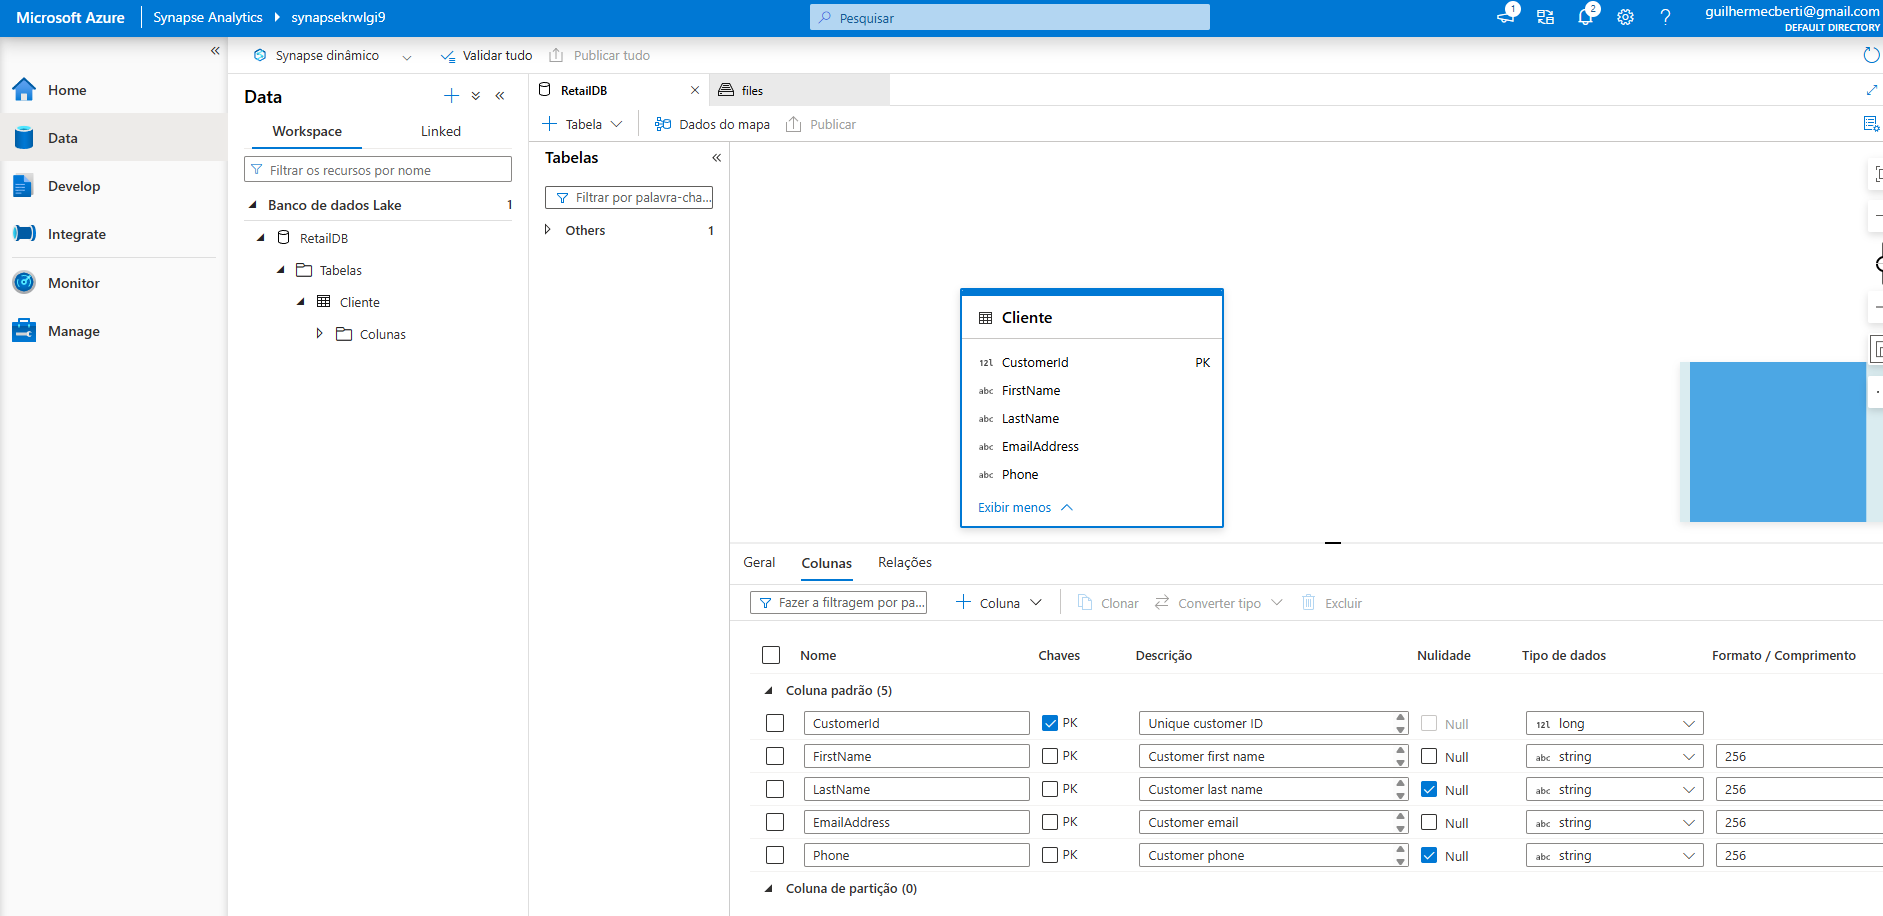

Depois de adicionar todas as colunas, publique o banco de dados novamente para salvar as alterações.

No painel Dados à esquerda, volte para a aba Área de Trabalho.

## Carregar dados no caminho de armazenamento da tabela

No painel principal, volte para a aba de arquivos, que contém o sistema de arquivos com a pasta RetailDB. Em seguida, abra a pasta RetailDB e crie uma nova pasta chamada Cliente.

Abra a nova pasta Cliente, que deve estar vazia.

Baixe o arquivo de dados customer.csv de https://raw.githubusercontent.com/MicrosoftLearning/dp-203-azure-data-engineer/master/Allfiles/labs/04/data/customer.csv

salve-o em uma pasta no seu computador local. Em seguida, na pasta Customer no Synapse Explorer, use o botão ⤒ Upload para enviar o arquivo customer.csv para a pasta RetailDB/Customer no seu data lake.

No painel Data à esquerda, na guia Espaço de trabalho, no menu … da tabela Cliente, selecione Novo script SQL > Selecionar as 100 principais linhas.

SELECT TOP 100 *
FROM customer

Em seguida, no novo painel de script SQL 1 que foi aberto, certifique-se de que o pool de SQL integrado esteja conectado e use o botão ▷ Executar para executar o código SQL.

Resultado(print de meu Synapse Studio):

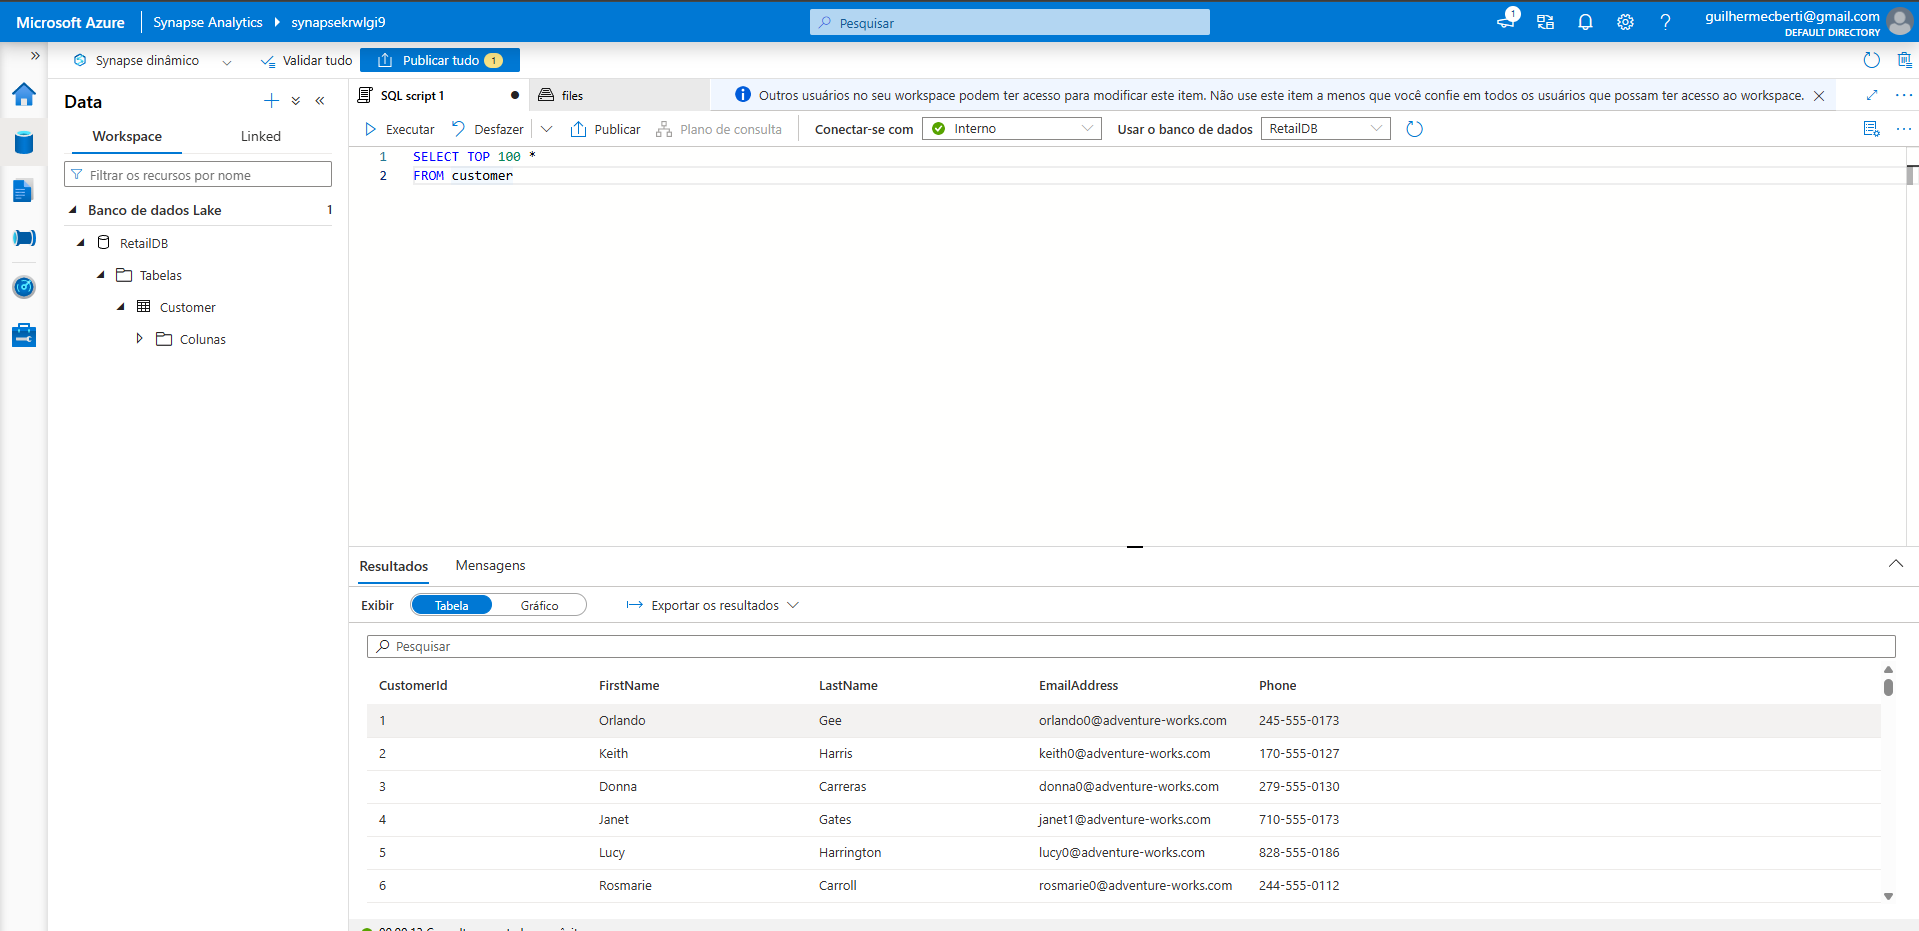

## Crie uma tabela a partir de um modelo de banco de dados

No entanto, o Azure Synapse Analytics também fornece vários modelos de banco de dados com base em cargas de trabalho e entidades comuns de banco de dados que você pode usar como ponto de partida para seu esquema de banco de dados.

No painel principal, volte para o painel RetailDB, que contém o esquema do seu banco de dados (atualmente contendo apenas a tabela Cliente).

No menu + Tabela, selecione Do modelo. Em seguida, na página Adicionar do modelo, selecione Varejo(Retail) e clique em Continuar.

Na página Adicionar do modelo (Varejo), aguarde o preenchimento da lista de tabelas, expanda Produto(Product) e selecione Produto de Varejo. Em seguida, clique em Adicionar. Isso adicionará uma nova tabela baseada no modelo Produto de Varejo(RetailProduct) ao seu banco de dados.

No painel RetailDB, selecione a nova tabela RetailProduct. Em seguida, no painel abaixo da tela de design, na aba Geral, altere o nome para Produto e verifique se as configurações de armazenamento da tabela especificam a pasta de entrada files/RetailDB/Product.

Na aba Colunas da tabela Produto, observe que a tabela já inclui um grande número de colunas herdadas do modelo. Há mais colunas do que o necessário para esta tabela, então você precisará remover algumas.

Marque a caixa de seleção ao lado de Nome para selecionar todas as colunas e, em seguida, desmarque as seguintes colunas (que você precisa manter):

ProductId,
ProductName,
IntroductionDate,
ActualAbandonmentDate,
ProductGrossWeight,
ItemSku.

Na barra de ferramentas do painel Colunas, selecione Excluir para remover as colunas selecionadas. Isso deve deixar as seguintes colunas(print de meu Synapse Studio):

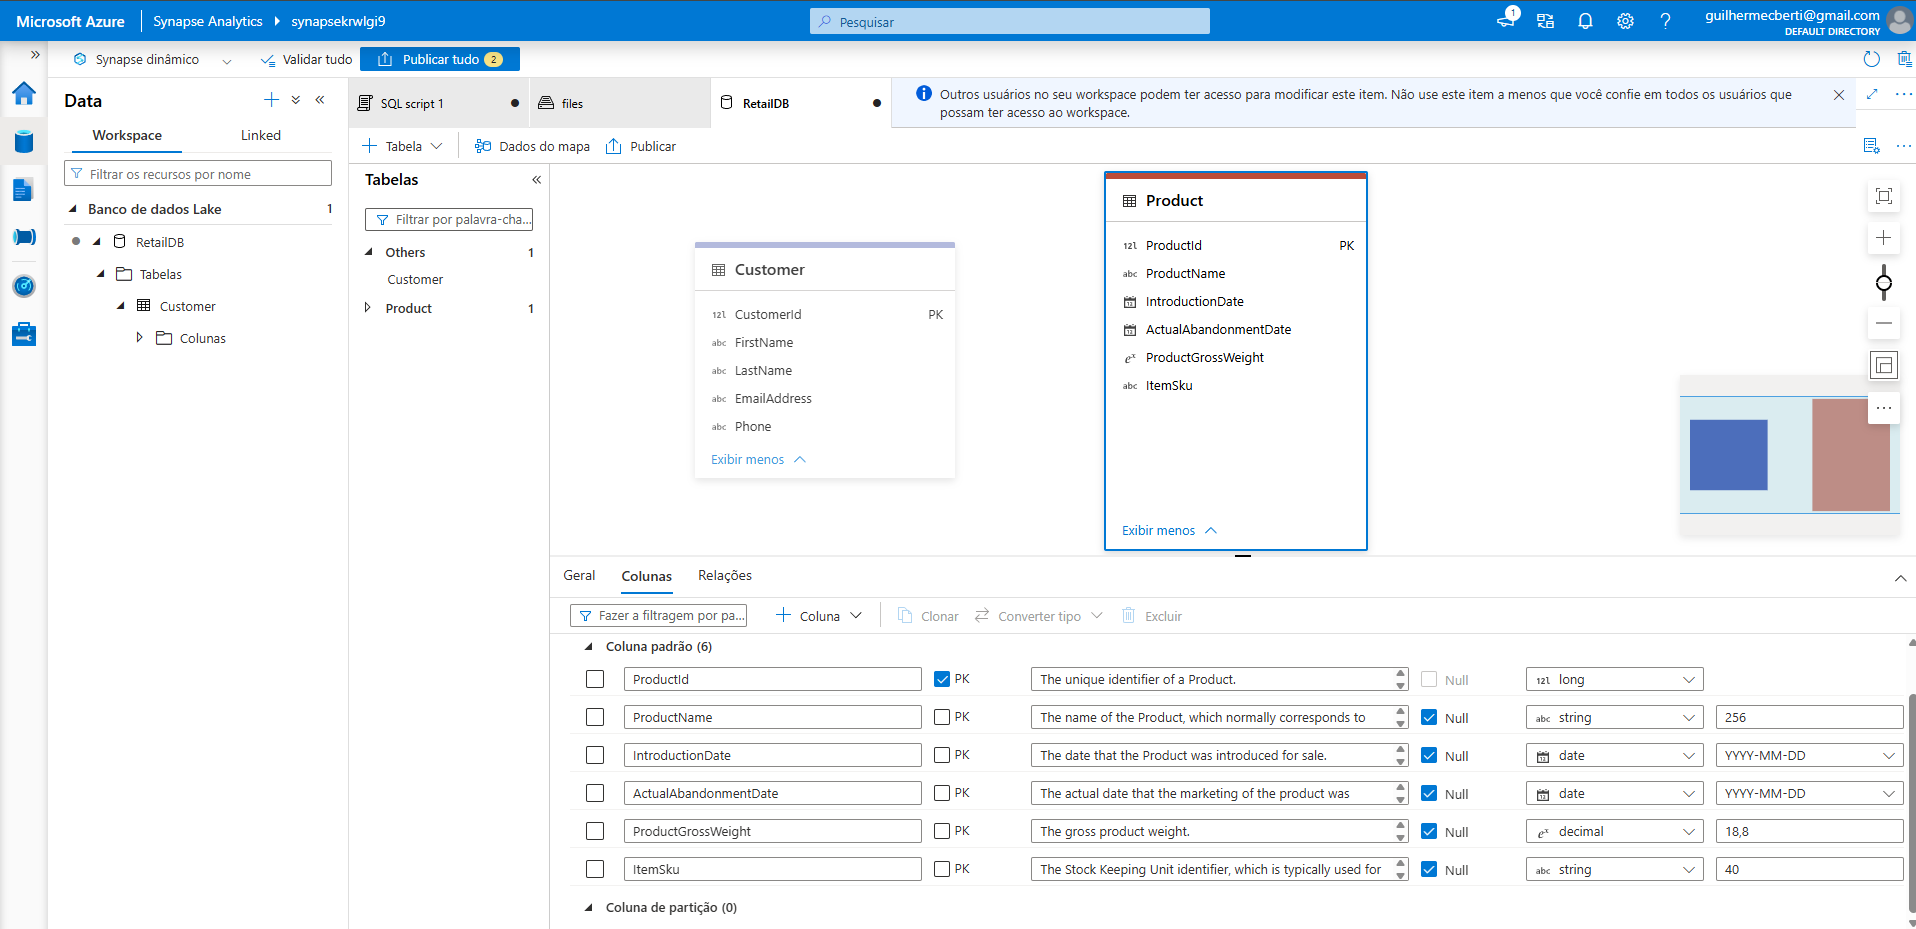

Adicione uma nova coluna chamada ListPrice

ListPrice	PK 🗆	The product price.	🗆	decimal	18,2

Depois de modificar as colunas conforme mostrado acima, publique o banco de dados novamente para salvar as alterações.

## Carregar dados no caminho de armazenamento da tabela 2

Baixe o arquivo de dados product.csv de https://raw.githubusercontent.com/MicrosoftLearning/dp-203-azure-data-engineer/master/Allfiles/labs/04/data/product.csv

Em seguida, na pasta Produto no Synapse Explorer, use o botão ⤒ Upload para carregar o arquivo product.csv para a pasta RetailDB/Product no seu data lake

resultado:

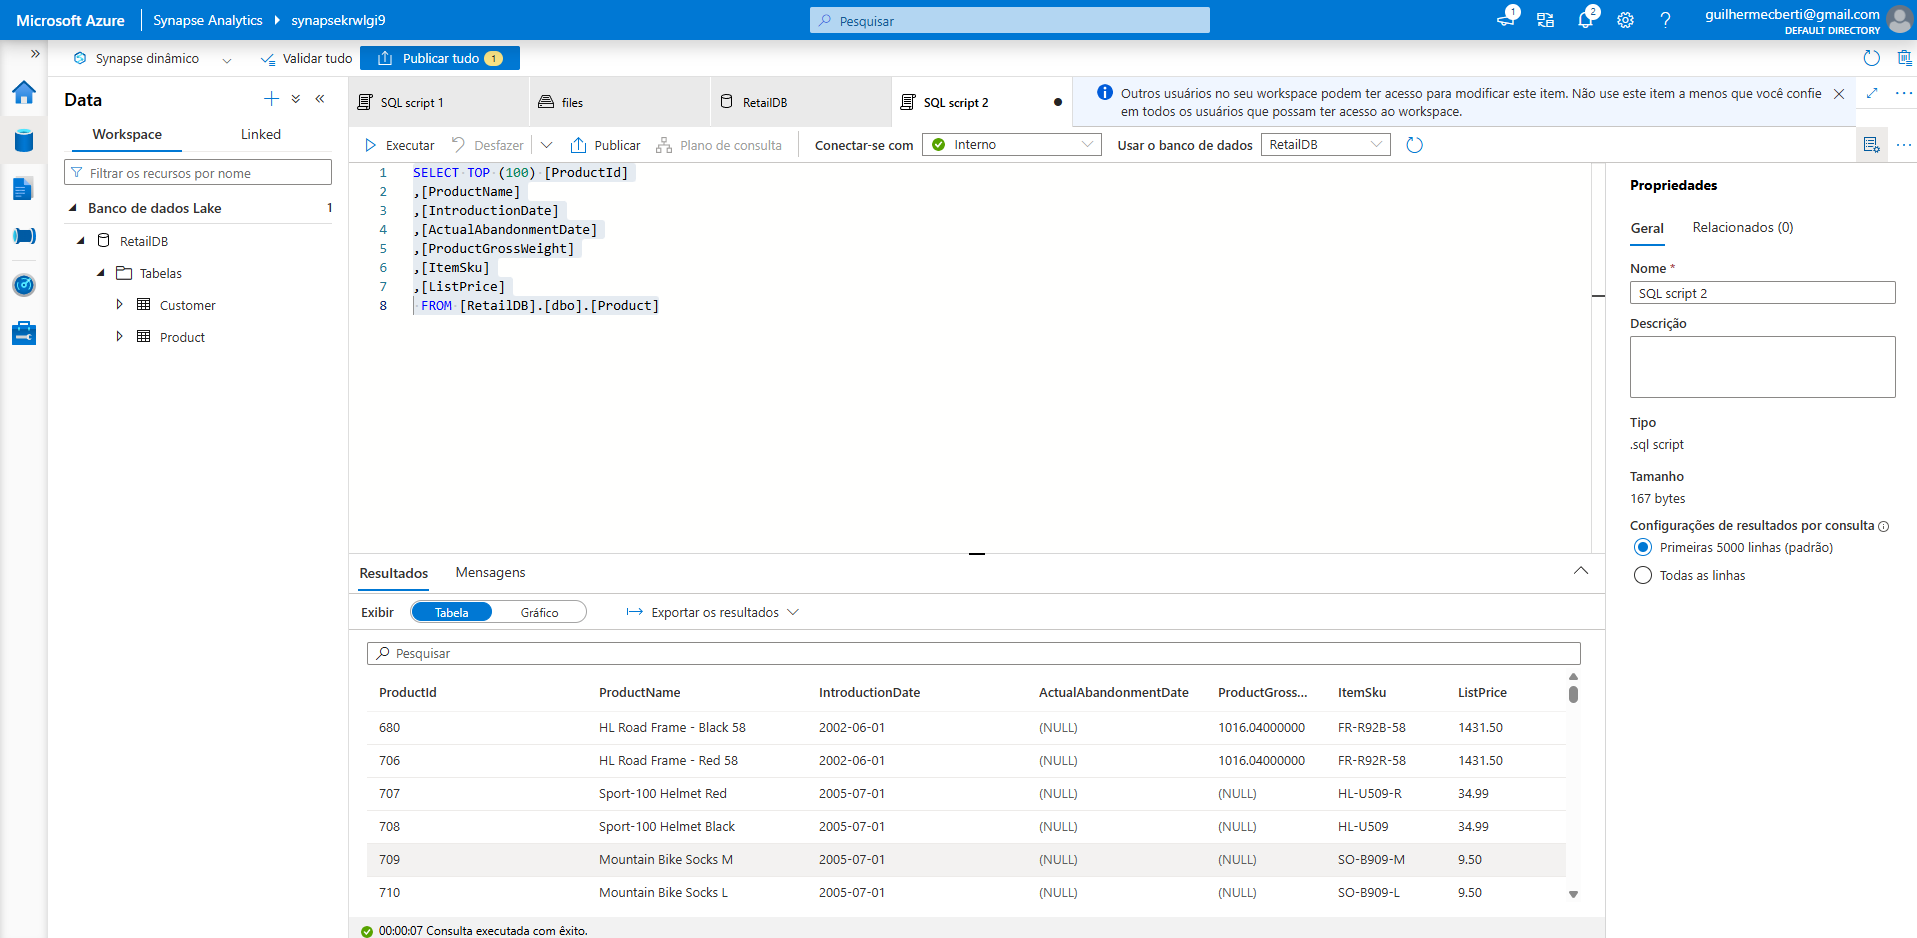

## Crie uma tabela a partir de dados existentes

Até agora, você criou tabelas e as preencheu com dados. Em alguns casos, você pode já ter dados em um data lake do qual deseja derivar uma tabela.

Na pasta RetailDB, crie uma nova pasta chamada SalesOrder.

Baixe o arquivo de dados salesorder.csv de https://raw.githubusercontent.com/MicrosoftLearning/dp-203-azure-data-engineer/master/Allfiles/labs/04/data/salesorder.csv

Em seguida, na pasta SalesOrder no Synapse Explorer, use o botão ⤒ Upload para carregar o arquivo salesorder.csv para a pasta RetailDB/SalesOrder no seu data lake.

**Criar uma tabela**

No menu + Tabela, selecione Do data lake. Em seguida, no painel Criar tabela externa do data lake, especifique as seguintes opções:

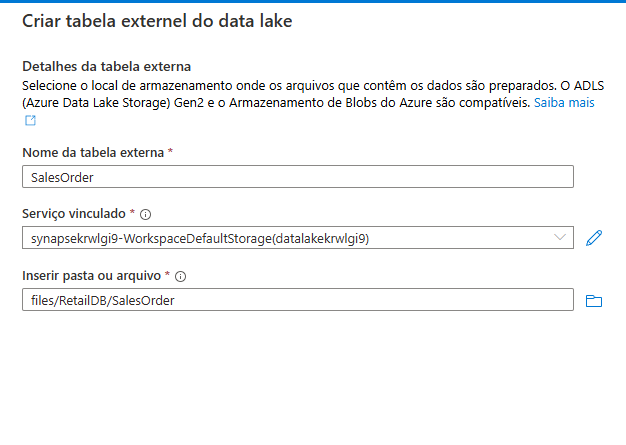

Continue para a próxima página e crie a tabela com as seguintes opções:

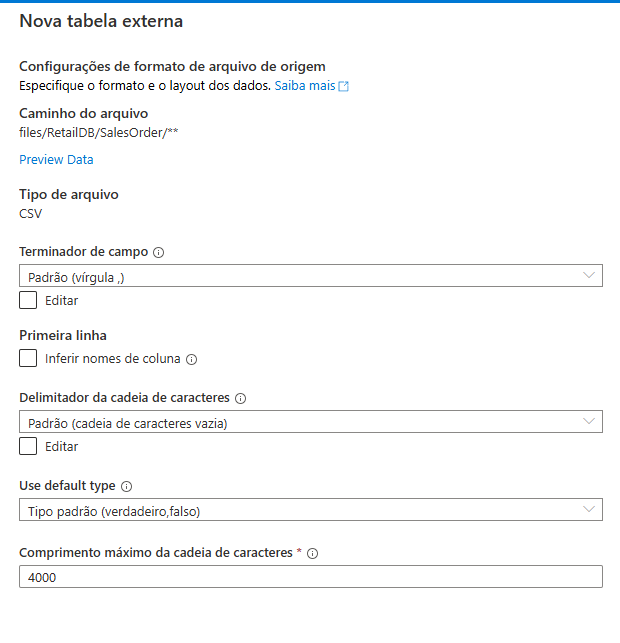

Após a criação da tabela, observe que ela inclui colunas denominadas C1, C2 e assim por diante, e que os tipos de dados foram inferidos a partir dos dados contidos na pasta. Modifique as definições das colunas da seguinte forma:

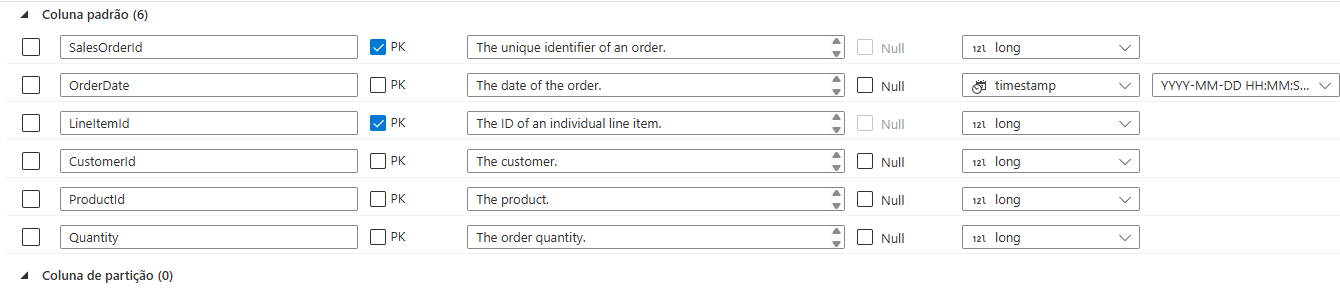

Na guia Relacionamentos da tabela SalesOrder, na lista + Relacionamento, selecione Para a tabela e defina o seguinte relacionamento:

Customer	CustomerId	SalesOrder	CustomerId

Adicione um segundo relacionamento Para tabela com as seguintes configurações:

Product	ProductId	SalesOrder	ProductId


A capacidade de definir relacionamentos entre tabelas ajuda a reforçar a integridade referencial entre entidades de dados relacionadas. Esse é um recurso comum de bancos de dados relacionais que, de outra forma, seria difícil de aplicar a arquivos em um data lake.

Publique o banco de dados novamente para salvar as alterações.

## Trabalhar com tabelas de banco de dados lake

Agora que você tem algumas tabelas em seu banco de dados, você pode usá-las para trabalhar com os dados subjacentes.

**Consultar tabelas usando SQL**

No Synapse Studio, selecione a página Desenvolver.

No painel Desenvolvimento, no menu +, selecione Script SQL

Digite o seguinte código SQL(Edite nomes se for necessário):

In [ ]:
 SELECT o.SalesOrderID, c.EmailAddress, p.ProductName, o.Quantity
 FROM SalesOrder AS o
 JOIN Customer AS c ON o.CustomerId = c.CustomerId
 JOIN Product AS p ON o.ProductId = p.ProductId

Os resultados mostram detalhes do pedido com informações do cliente e do produto.

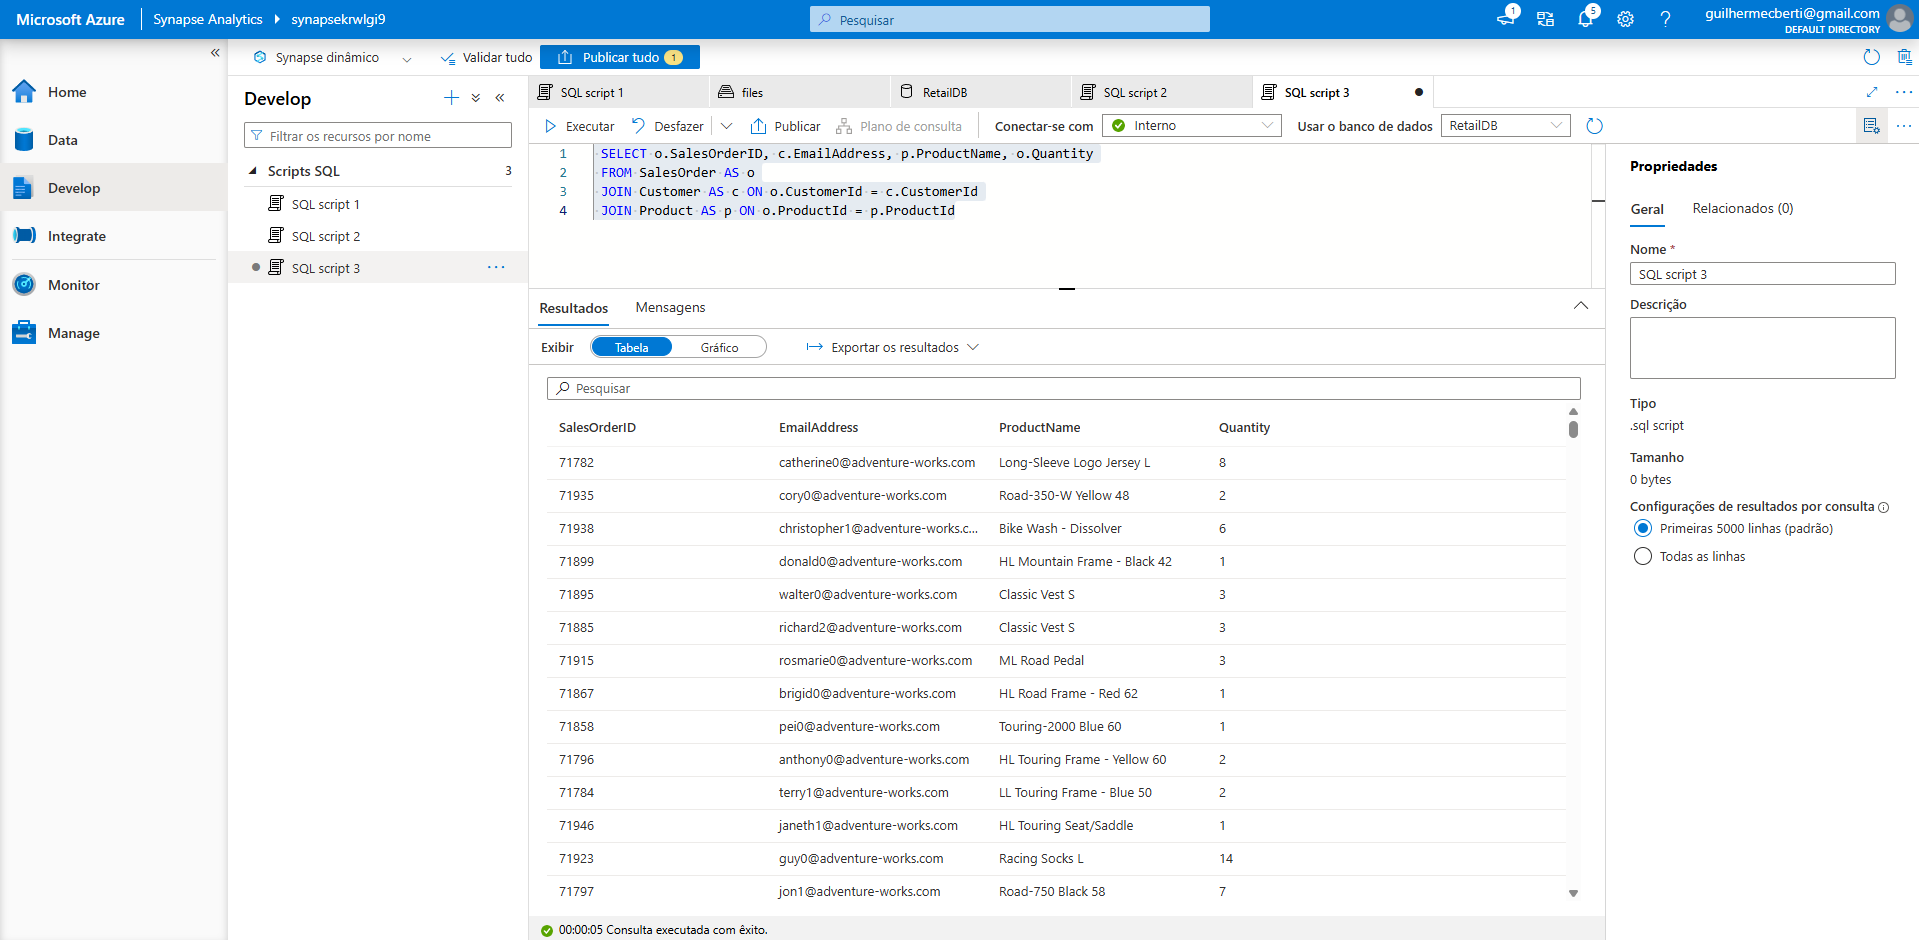

**Inserir dados usando Spark**

No painel Desenvolvimento, no menu +, selecione Notebook.

No novo painel Notebook 1, anexe o notebook ao pool Sparkxxxxxxx*.

Digite o seguinte código na célula vazia do notebook:

In [ ]:
 %%sql
 INSERT INTO `RetailDB`.`SalesOrder` VALUES (99999, CAST('2022-01-01' AS TimeStamp), 1, 6, 5, 1)

Use o botão ▷ à esquerda da célula para executá-lo e aguarde o término da execução. Observe que levará algum tempo para iniciar o pool Spark.

Use o botão + Código para adicionar uma nova célula ao caderno.

Digite o seguinte código na nova célula:

In [ ]:
 %%sql
 SELECT * FROM `RetailDB`.`SalesOrder` WHERE SalesOrderId = 99999

Use o botão ▷ à esquerda da célula para executá-la e verificar se uma linha para o pedido de venda 99999 foi inserida na tabela SalesOrder.

Feche o painel do Notebook 1, interrompendo a sessão do Spark e descartando suas alterações. Observe o resultado(Print de meu Azure Studio):

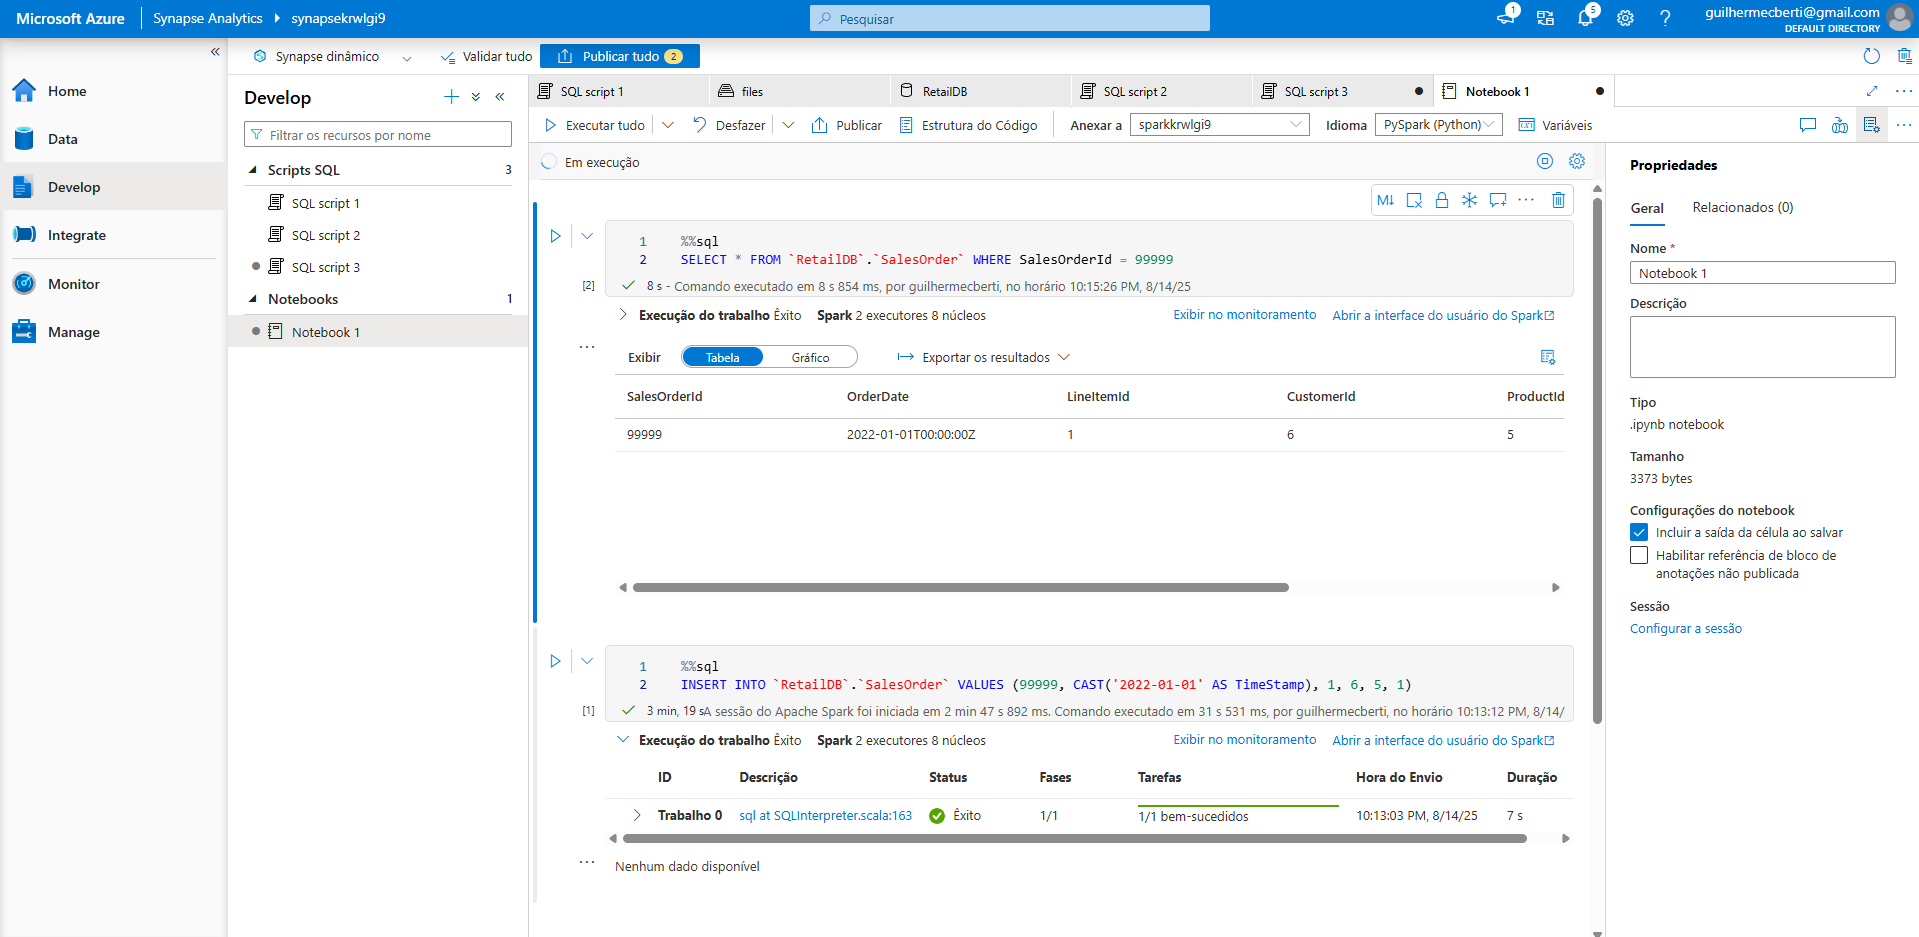